# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudespip
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
                
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_city = city.title()
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city_city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=blackmans bay
Processing Record 2 of Set 1 | grytviken
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=grytviken
Processing Record 3 of Set 1 | taiohae
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=tiksi
Processing Record 5 of Set 1 | novodvinsk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=novodvinsk
Processing Record 6 of Set 1 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=sao 

Processing Record 3 of Set 2 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=bredasdorp
Processing Record 4 of Set 2 | wajir
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=wajir
Processing Record 5 of Set 2 | khandyga
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=khandyga
Processing Record 6 of Set 2 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=derzhavinsk
Processing Record 7 of Set 2 | hammerfest
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=hammerfest
Processing Record 8 of Set 2 | selfoss
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=selfoss
Processing Record 9 of Set 2 | adamstown
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 9 of Set 3 | kristiansund
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=kristiansund
Processing Record 10 of Set 3 | pogar
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=pogar
Processing Record 11 of Set 3 | aasiaat
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=aasiaat
Processing Record 12 of Set 3 | djibo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=djibo
Processing Record 13 of Set 3 | uribia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=uribia
Processing Record 14 of Set 3 | narvik
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=narvik
Processing Record 15 of Set 3 | augusta
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a

Processing Record 13 of Set 4 | kayangel
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=kayangel
Processing Record 14 of Set 4 | graaff-reinet
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=graaff-reinet
Processing Record 15 of Set 4 | gaur
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=gaur
Processing Record 16 of Set 4 | kirensk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=kirensk
Processing Record 17 of Set 4 | kingscliff
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=kingscliff
Processing Record 18 of Set 4 | bardai
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=bardai
Processing Record 19 of Set 4 | yambio
http://api.openweathermap.org/data/2.5/weather?units=me

Processing Record 17 of Set 5 | jiaojiang
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=jiaojiang
Processing Record 18 of Set 5 | pisco
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=pisco
Processing Record 19 of Set 5 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=coquimbo
Processing Record 20 of Set 5 | salinas
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=salinas
Processing Record 21 of Set 5 | colares
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=colares
Processing Record 22 of Set 5 | hilo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=hilo
Processing Record 23 of Set 5 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a

Processing Record 25 of Set 6 | chicxulub puerto
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=chicxulub puerto
City not found. Skipping...
Processing Record 26 of Set 6 | kaba
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=kaba
Processing Record 27 of Set 6 | santa terezinha
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=santa terezinha
Processing Record 28 of Set 6 | santangpu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=santangpu
Processing Record 29 of Set 6 | horta
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=horta
Processing Record 30 of Set 6 | kaka
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=kaka
Processing Record 31 of Set 6 | arraial do cabo
http://a

Processing Record 29 of Set 7 | lethbridge
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=lethbridge
Processing Record 30 of Set 7 | minas de marcona
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=minas de marcona
Processing Record 31 of Set 7 | alvaraes
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=alvaraes
Processing Record 32 of Set 7 | ancud
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=ancud
Processing Record 33 of Set 7 | kuah
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=kuah
Processing Record 34 of Set 7 | patacamaya
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=patacamaya
Processing Record 35 of Set 7 | weno
http://api.openweathermap.org/data/2.5/weather?

Processing Record 35 of Set 8 | prado
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=prado
Processing Record 36 of Set 8 | cananeia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=cananeia
Processing Record 37 of Set 8 | nelson bay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=nelson bay
Processing Record 38 of Set 8 | matane
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=matane
Processing Record 39 of Set 8 | kerikeri
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=kerikeri
Processing Record 40 of Set 8 | as safirah
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=as safirah
Processing Record 41 of Set 8 | fannuj
http://api.openweathermap.org/data/2.5/weather?units=metr

Processing Record 40 of Set 9 | barreirinhas
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=barreirinhas
Processing Record 41 of Set 9 | freeport
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=freeport
Processing Record 42 of Set 9 | rabigh
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=rabigh
Processing Record 43 of Set 9 | am timan
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=am timan
Processing Record 44 of Set 9 | chinde
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=chinde
Processing Record 45 of Set 9 | mahdia
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=mahdia
Processing Record 46 of Set 9 | wuhai
http://api.openweathermap.org/data/2.5/weather?units=metric&

Processing Record 47 of Set 10 | lakatoro
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=lakatoro
Processing Record 48 of Set 10 | papao
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=papao
Processing Record 49 of Set 10 | okha
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=okha
Processing Record 0 of Set 11 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=mount gambier
Processing Record 1 of Set 11 | negotin
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=negotin
Processing Record 2 of Set 11 | linxia chengguanzhen
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=linxia chengguanzhen
Processing Record 3 of Set 11 | island harbour
http://api.openweathermap.

Processing Record 2 of Set 12 | planaltina
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=planaltina
Processing Record 3 of Set 12 | benghazi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=benghazi
Processing Record 4 of Set 12 | port blair
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=port blair
Processing Record 5 of Set 12 | butembo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=butembo
Processing Record 6 of Set 12 | saynshand
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=saynshand
Processing Record 7 of Set 12 | pico truncado
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=pico truncado
Processing Record 8 of Set 12 | hotan
http://api.openweathermap.org/data/2.5

Processing Record 8 of Set 13 | inari
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=inari
Processing Record 9 of Set 13 | maceio
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=maceio
Processing Record 10 of Set 13 | naze
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=naze
Processing Record 11 of Set 13 | boa esperanca do sul
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=boa esperanca do sul
Processing Record 12 of Set 13 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=severo-yeniseyskiy
Processing Record 13 of Set 13 | quang ngai
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=c3a397c707e987d5dcac10778ecd3d21&q=quang ngai
Processing Record 14 of Set 13 | peterhead
http://api.openwe

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Blackmans Bay,-43.0167,147.3167,8.62,85,100,2.57,AU,1691678593
1,Grytviken,-54.2811,-36.5092,-3.76,90,93,3.76,GS,1691678593
2,Tiksi,71.6872,128.8694,16.83,48,7,3.29,RU,1691678593
3,Novodvinsk,64.4165,40.8122,26.69,51,0,1.75,RU,1691678593
4,Sao Joao Da Barra,-21.6403,-41.0511,25.05,75,49,6.05,BR,1691678593


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Blackmans Bay,-43.0167,147.3167,8.62,85,100,2.57,AU,1691678593
1,Grytviken,-54.2811,-36.5092,-3.76,90,93,3.76,GS,1691678593
2,Tiksi,71.6872,128.8694,16.83,48,7,3.29,RU,1691678593
3,Novodvinsk,64.4165,40.8122,26.69,51,0,1.75,RU,1691678593
4,Sao Joao Da Barra,-21.6403,-41.0511,25.05,75,49,6.05,BR,1691678593


In [8]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

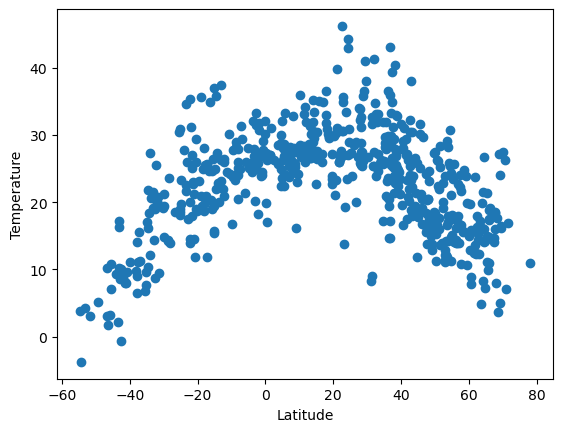

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

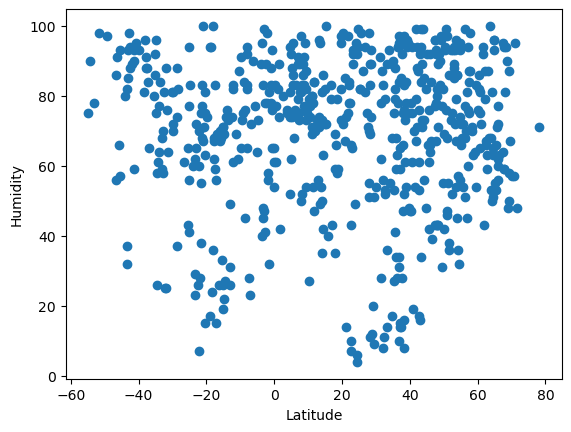

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

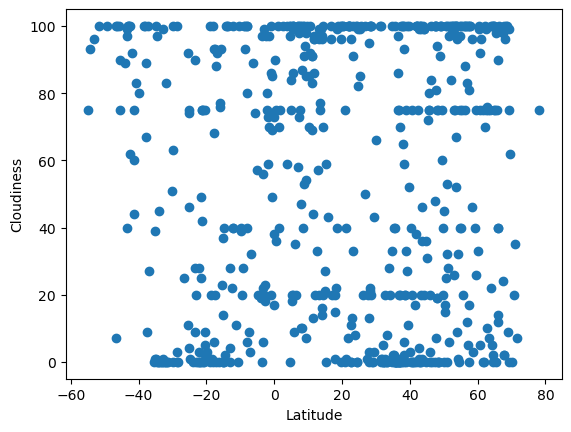

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

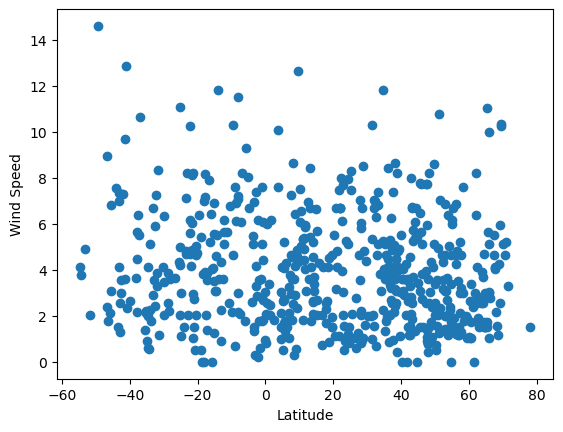

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_chart(x_value, y_value, y_label, text_coord):
    (slope, intercept, r_value, p_value, stderr) = linregress(x_value, y_value)
    
    
    print(f"The r-value is: {r_value}")
    regress_values = x_value * slope + intercept
    
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, color="r")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.fig()
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Tiksi,71.6872,128.8694,16.83,48,7,3.29,RU,1691678593
3,Novodvinsk,64.4165,40.8122,26.69,51,0,1.75,RU,1691678593
5,Iqaluit,63.7506,-68.5145,4.85,100,75,2.57,CA,1691678593
8,Bilibino,68.0546,166.4372,8.04,81,96,2.18,RU,1691678593
9,Remire-Montjoly,4.9167,-52.2667,32.02,62,75,4.12,GF,1691678594
...,...,...,...,...,...,...,...,...,...
586,Naze,28.3667,129.4833,25.51,89,100,2.22,JP,1691678617
588,Severo-Yeniseyskiy,60.3725,93.0408,12.89,86,100,1.05,RU,1691678627
589,Quang Ngai,15.1167,108.8000,27.67,82,21,2.03,VN,1691678627


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Blackmans Bay,-43.0167,147.3167,8.62,85,100,2.57,AU,1691678593
1,Grytviken,-54.2811,-36.5092,-3.76,90,93,3.76,GS,1691678593
4,Sao Joao Da Barra,-21.6403,-41.0511,25.05,75,49,6.05,BR,1691678593
6,Port-Aux-Francais,-49.3500,70.2167,5.10,97,100,14.61,TF,1691678593
7,Invercargill,-46.4000,168.3500,1.68,91,100,1.79,NZ,1691678593
...,...,...,...,...,...,...,...,...,...
570,Cururupu,-1.8283,-44.8683,30.76,56,73,3.55,BR,1691678626
573,San Rafael,-34.6177,-68.3301,16.16,26,97,4.13,AR,1691678519
574,Port Saint John'S,-31.6229,29.5448,20.77,76,0,8.34,ZA,1691678626


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5970050910488456


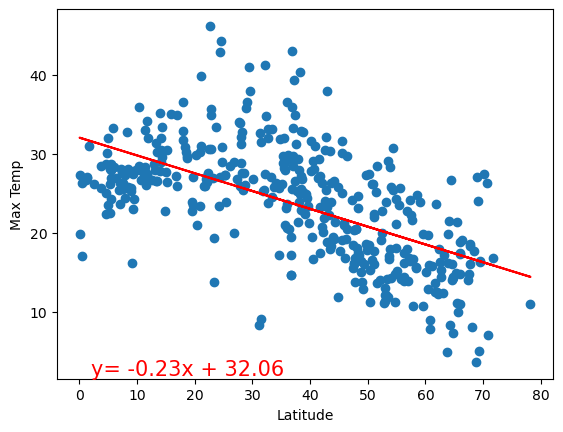

In [30]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_chart(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (2,2))

The r-value is: 0.776548687151711


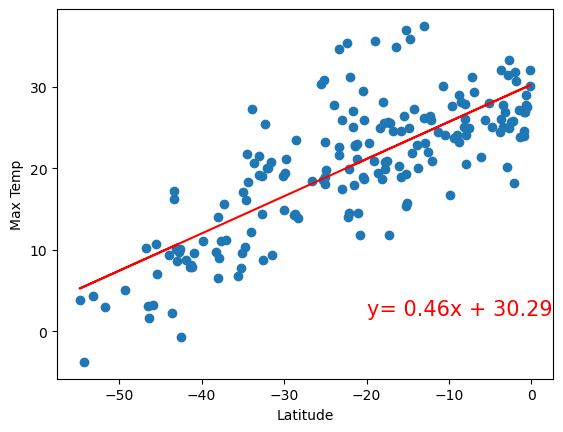

In [29]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_chart(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-20,2))

**Discussion about the linear relationship:** These charts are show the linear relationship between Max Temperature & Latitude. As you can see, there is a  strong relationship between temperature & Latitude  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0177405471757853


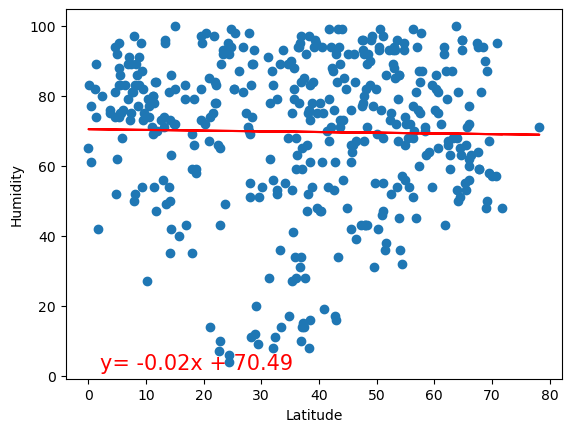

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
plot_chart(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (2,2))

The r-value is: -0.17451308889382922


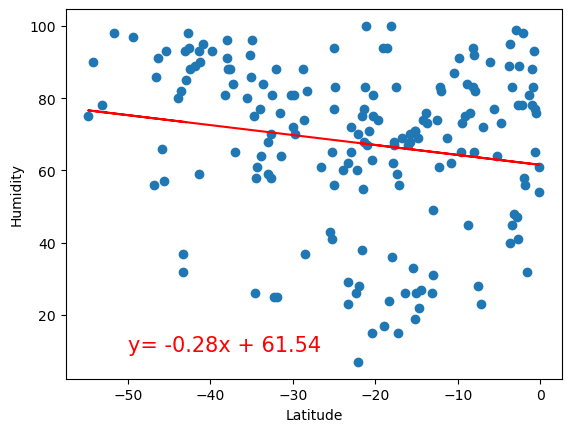

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
plot_chart(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-50,10))

**Discussion about the linear relationship:** These charts show the relationship between latitude & humidity. There is not much of a relationship between these variables

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.060245124161662104


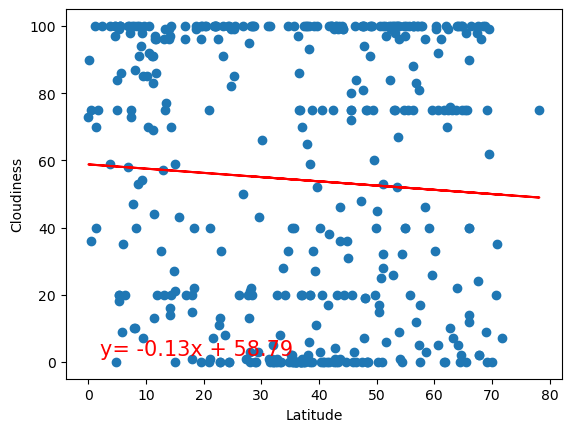

In [25]:
# Northern Hemisphere
# YOUR CODE HERE
plot_chart(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (2,2))

The r-value is: -0.1281854601717201


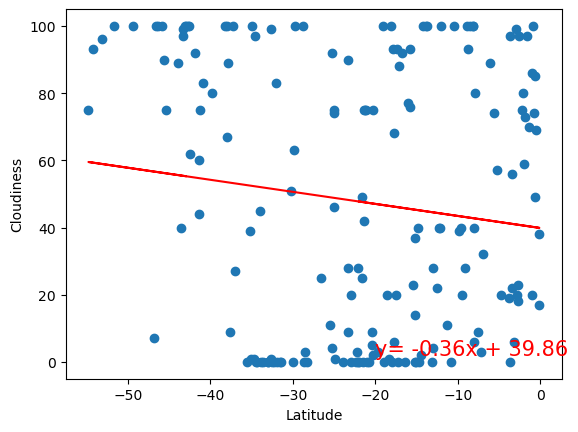

In [26]:
# Southern Hemisphere
# YOUR CODE HERE
plot_chart(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-20,2))

**Discussion about the linear relationship:** These charts show the relationship between  Cloudiness & Latitude. Either Max cloud coverage or no clouds were the most prevelant cloudiness readings and were prevelatant across a wide range of latitudes

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06226629288799625


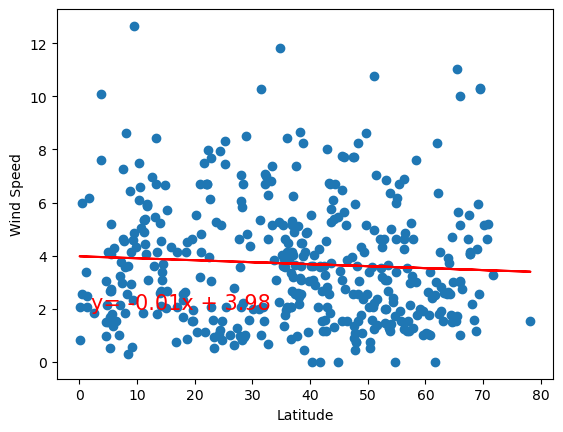

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
plot_chart(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (2,2))

The r-value is: -0.02971778301725819


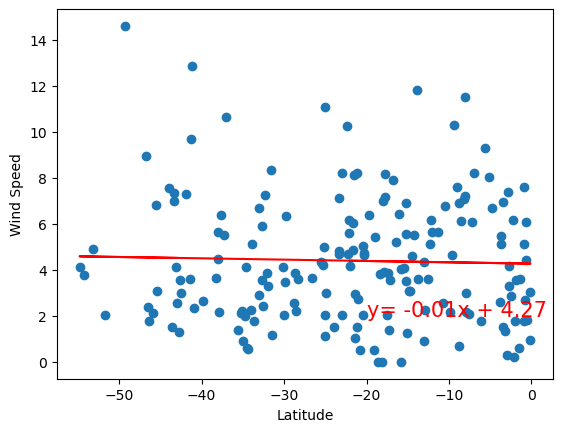

In [28]:
# Southern Hemisphere
# YOUR CODE HERE
plot_chart(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-20,2))

**Discussion about the linear relationship:** These charts show the relationship between wind speed & latitude. There wasn't much of a relationship in teh data. 